In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read data

In [4]:
df = pd.read_csv('final_grep_data.csv')

### Script to pplot graphs

In [48]:
def plot_complexity_grid(df, x="regex_complexity", y="execution_time (ms)"):
    # Create a 2x3 grid of subplots
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Compare by Matcher', y=1.02)
    
    # Flatten axes for easier iteration
    axes_flat = axes.flatten()
    
    # Plot each matcher in its own subplot
    for idx, matcher in enumerate(df['matcher'].unique()):
        matcher_data = df[df['matcher'] == matcher]
        
        # Scatter plot
        sns.scatterplot(data=matcher_data,
                       x=x,
                       y=y,
                       ax=axes_flat[idx],
                       alpha=0.6)
        
        # Add regression line
        sns.regplot(data=matcher_data,
                   x=x,
                   y=y,
                   scatter=False,
                   color='red',
                   ax=axes_flat[idx])
        
        axes_flat[idx].set_title(f'Matcher: {matcher}')
        axes_flat[idx].set_xlabel(x)
        axes_flat[idx].set_ylabel(y)
        
        # Add correlation coefficient to the title using the actual plotted variables
        correlation = matcher_data[x].corr(matcher_data[y])
        axes_flat[idx].set_title(f'Matcher: {matcher}\nCorrelation: {correlation:.3f}')
    
    # Remove the last subplot (since we only need 5)
    axes_flat[5].remove()
    
    # Adjust spacing between subplots
    plt.tight_layout()
    
    return fig

### Regex complexity vs exec time

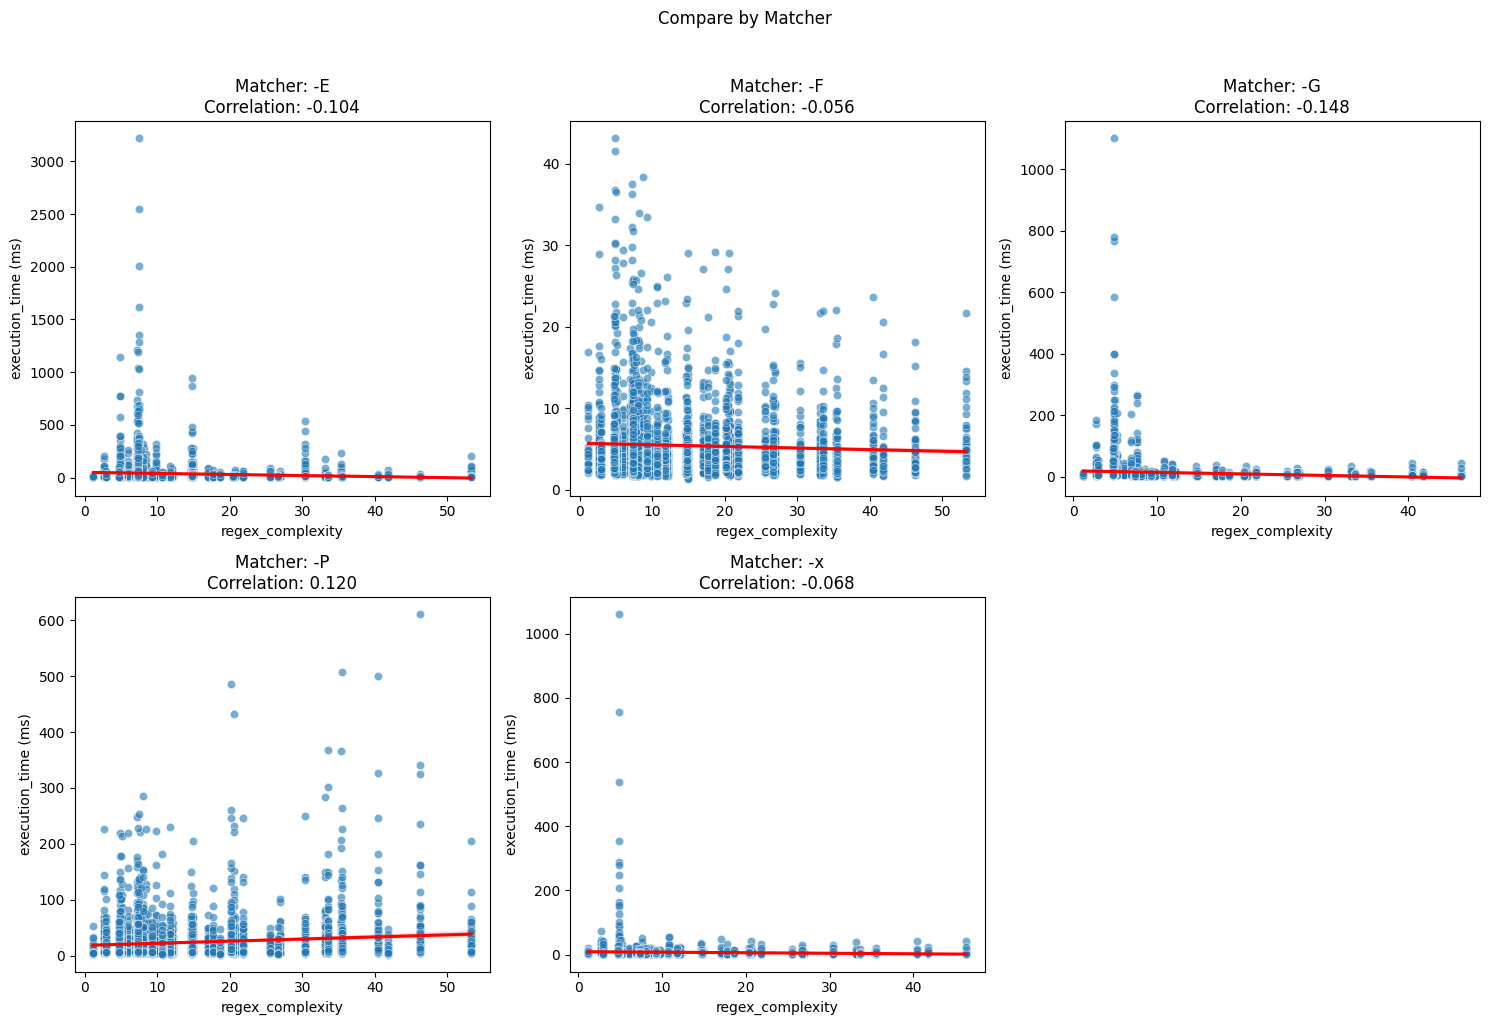

In [49]:
fig = plot_complexity_grid(df)
plt.show()

### Input file size vs exec time

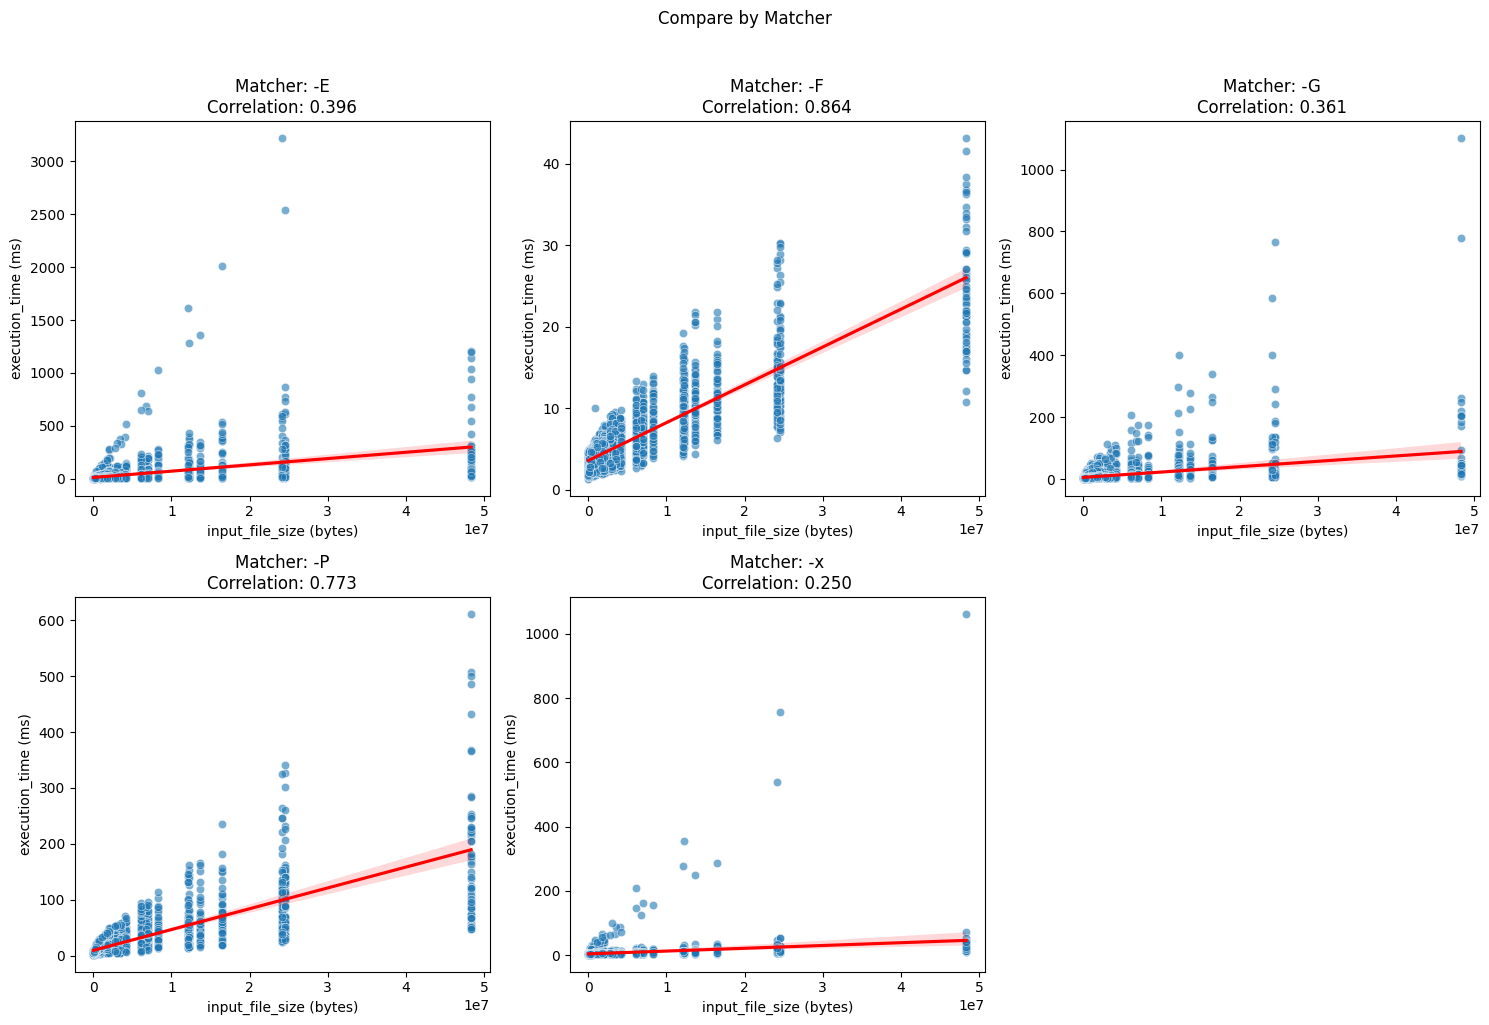

In [50]:
fig = plot_complexity_grid(df, x="input_file_size (bytes)")
plt.show()

### regex length vs exec time

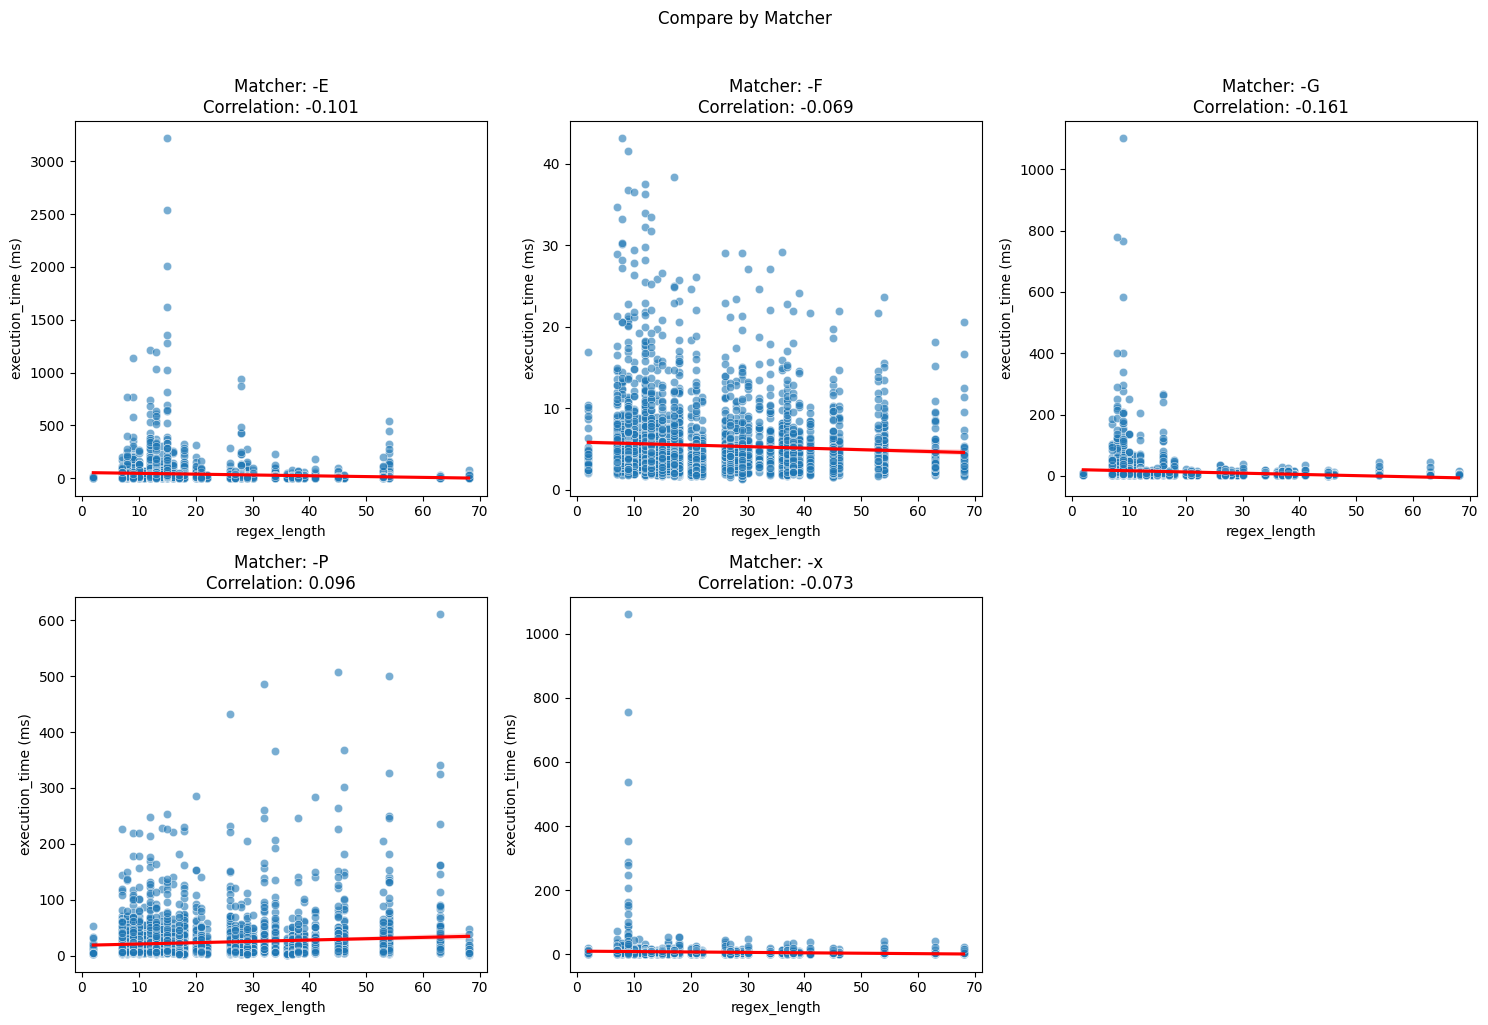

In [52]:
fig = plot_complexity_grid(df, x="regex_length", y="execution_time (ms)")
plt.show()

### Input file size vs regex complexity

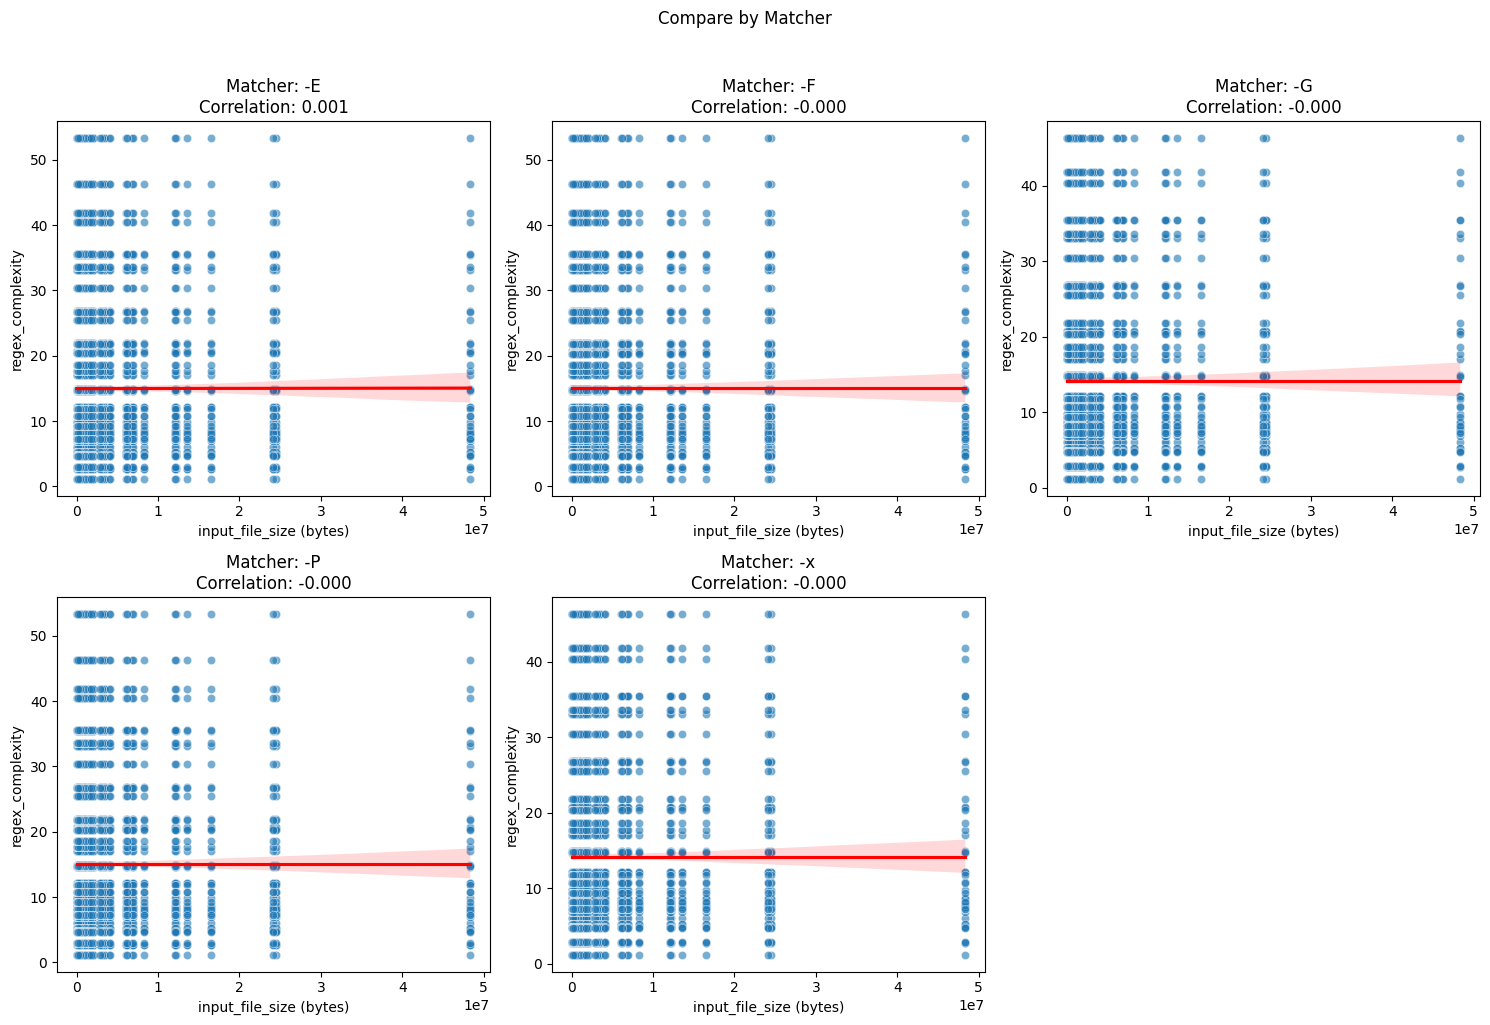

In [51]:
fig = plot_complexity_grid(df, x="input_file_size (bytes)", y="regex_complexity")
plt.show()

In [ ]:
df["regex_length"]